# Assignment 2: Ensemble Methods


## Instructions

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: Raksha Chandrashekar
## UNI: rc3729

# Dataset Description: Telco Customer Churn Dataset

This dataset contains information about customers of a telecommunications company. The goal is to predict whether a customer will churn (leave the service). The details of the features and target variable are listed below:

## Features:
- **gender**: Gender of the customer
- **SeniorCitizen**: Whether the customer is a senior citizen (1) or not (0)
- **Partner**: Whether the customer has a partner
- **Dependents**: Whether the customer has dependents
- **tenure**: Number of months the customer has been with the company
- **PhoneService**: Whether the customer has phone service
- **MultipleLines**: Whether the customer has multiple lines
- **InternetService**: Type of internet service (DSL, Fiber optic, None)
- **OnlineSecurity**: Whether the customer has online security service
- **OnlineBackup**: Whether the customer has online backup service
- **DeviceProtection**: Whether the customer has device protection service
- **TechSupport**: Whether the customer has tech support service
- **StreamingTV**: Whether the customer has streaming TV service
- **StreamingMovies**: Whether the customer has streaming movies service
- **Contract**: Type of contract (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer uses paperless billing
- **PaymentMethod**: Customer's payment method
- **MonthlyCharges**: The monthly charge paid by the customer
- **TotalCharges**: The total charges paid by the customer

## Objective:
The target variable (**Churn**) is binary (Yes/No), and the goal is to predict whether a customer will churn based on the given features.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, make_scorer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

## Question 1: Decision Trees


**1.1: Load the Telco Customer Churn Dataset and inspect its structure.**


In [92]:
## YOUR CODE HERE
telco_df = pd.read_csv('Telco-Customer-Churn-1.csv')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes



**Run the code below to convert TotalCharges to numeric**


In [93]:
# Convert TotalCharges to numeric
telco_df["TotalCharges"] = pd.to_numeric(telco_df["TotalCharges"], errors="coerce")
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**

In [94]:
## YOUR CODE HERE
print(telco_df.isnull().sum())
print("Total missing values: ", telco_df.isnull().sum().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Total missing values:  11


**Add comment here**<br>
Yes, there are 11 missing values, and all of them are under the TotalCharges column. 
There are several ways to deal with missing data.
- Since the number of missing data is small (11), we can drop the respective row
- Check the relationship between the missing values column and other features. From the below data, we can see that TotalCharges is highly correlated with tenure and MonthlyCharges. Therefore, we cannot just fill in the missing values with random data (like 0 or the mean/median).

We can draw a relation between the 3 features as: <br>
        TotalCharges = tenure * MonthlyCharges<br>
Fill in the missing values by using the above formula.

Datatype of TotalCharges:  float64
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
                TotalCharges   tenure  MonthlyCharges
TotalCharges        1.000000  0.82588        0.651065
tenure              0.825880  1.00000        0.247900
MonthlyCharges      0.651065  0.24790        1.000000


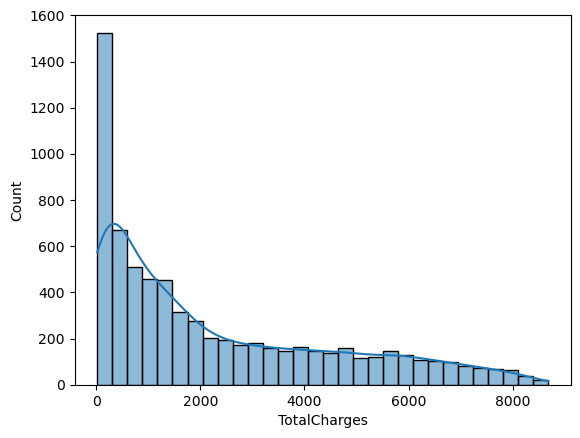

(7043, 21)


In [95]:
print("Datatype of TotalCharges: ", telco_df["TotalCharges"].dtypes)
print(telco_df["TotalCharges"].describe())
print(telco_df[["TotalCharges", "tenure", "MonthlyCharges"]].corr())
sns.histplot(telco_df["TotalCharges"], bins=30, kde=True)
plt.show()

print(telco_df.shape)
#print(telco_df.isnull().sum())

In [96]:
# Handling missing values
telco_df.loc[:, "TotalCharges"] = telco_df["TotalCharges"].fillna(telco_df["tenure"] * telco_df["MonthlyCharges"])

missing_values = telco_df.isnull().sum()
print("The missing values are: ")
print(missing_values)
print(telco_df.shape)

The missing values are: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
(7043, 21)


**Comment** <br>
From the above output, we can see that there are no missing data now as they have been handled by using the formula mentioned above.


**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable. Drop unique identifier "customerID"**


Categorical columns: 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


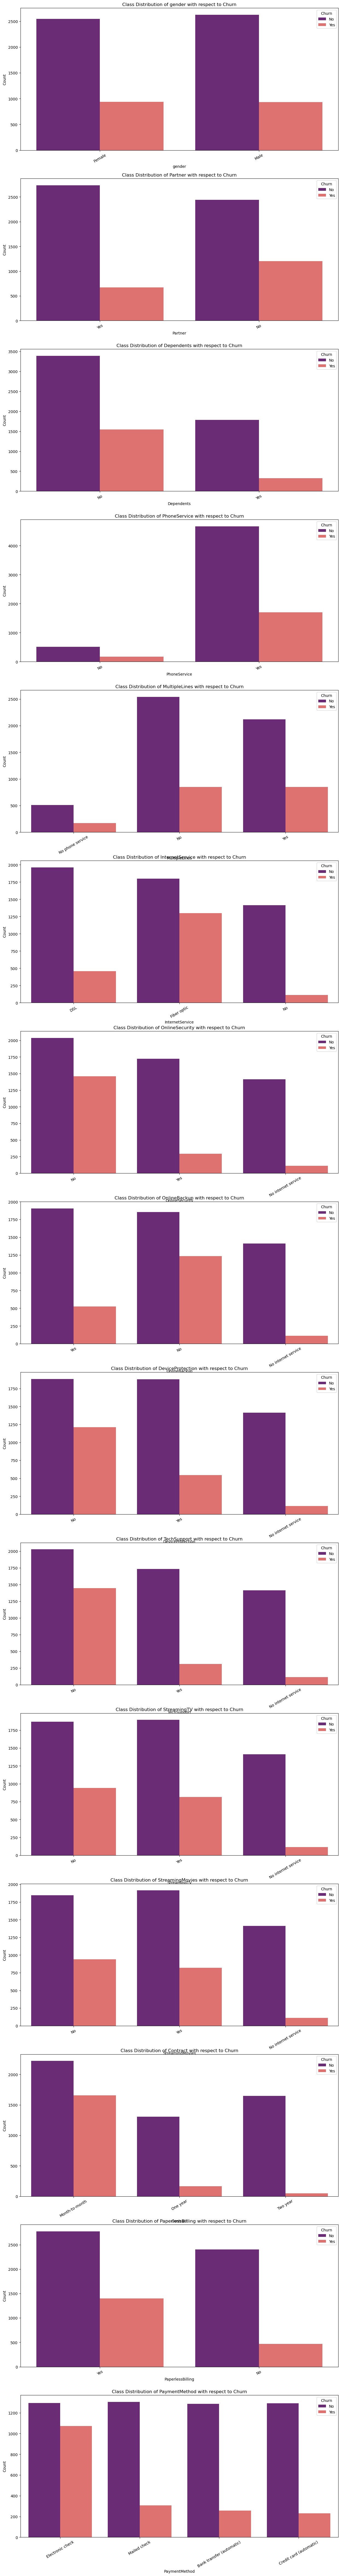

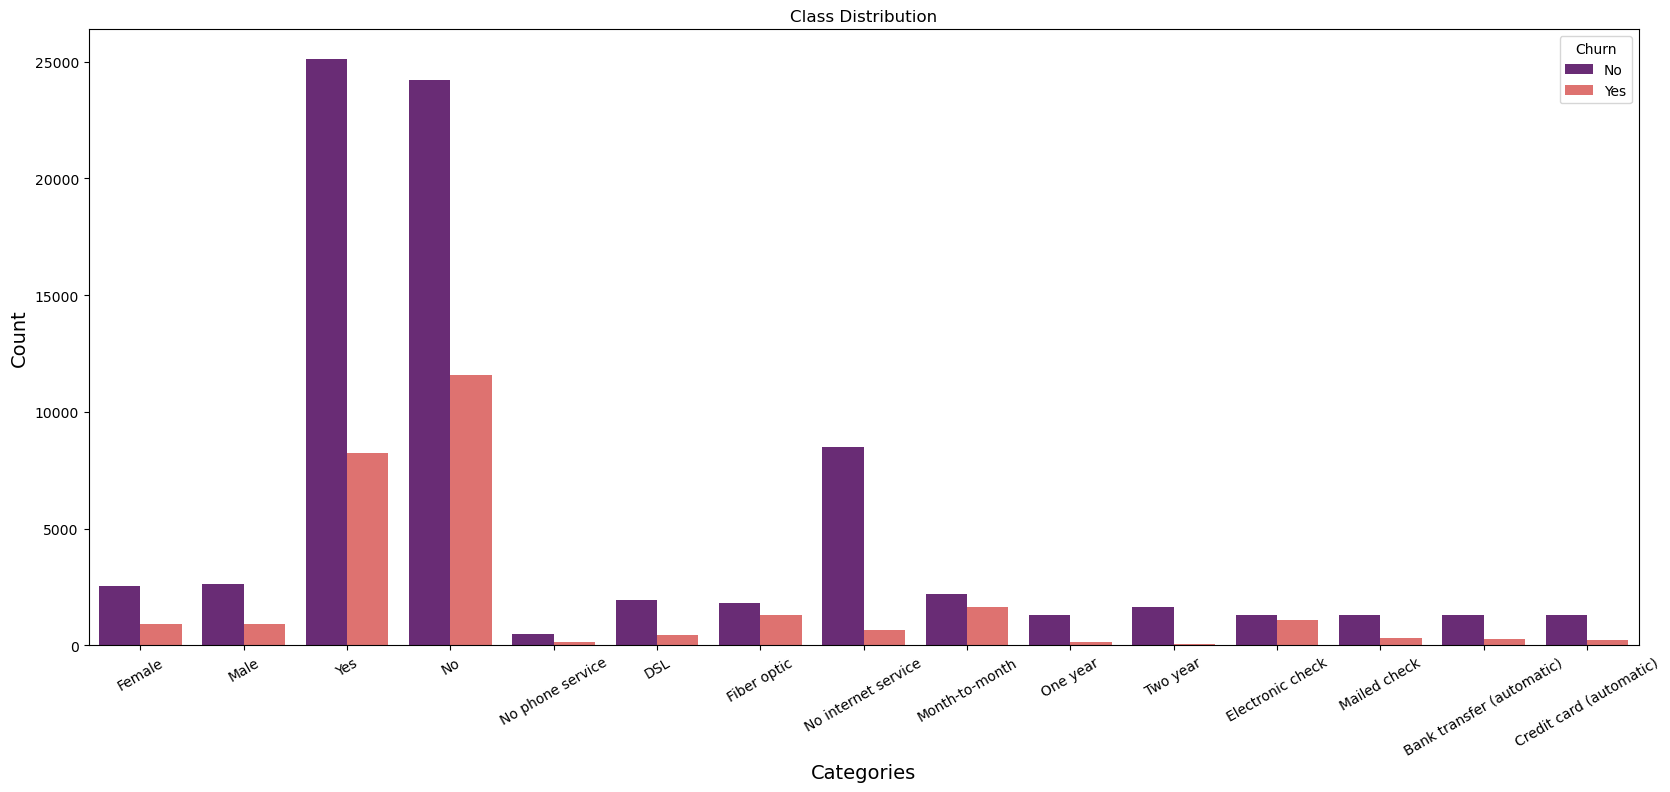

In [97]:
## YOUR CODE HERE
telco_df.drop(columns="customerID", inplace=True)

#print(telco_df.select_dtypes(include=["object"]))
categorical_columns = telco_df.select_dtypes(include=["object"]).columns.tolist()
#print("Categorical columns: \n", categorical_columns)
categorical_columns.remove("Churn")
print("Categorical columns: \n", categorical_columns)

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(15, len(categorical_columns)*8))
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=telco_df, x=col, hue="Churn", ax=ax, palette="magma")
    ax.set_title(f"Class Distribution of {col} with respect to Churn")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Churn", loc="upper right")
    ax.tick_params(axis='x', rotation=30)

telco_df_melted = telco_df.melt(id_vars=["Churn"], value_vars=categorical_columns, var_name="Feature", value_name="Category")
plt.figure(figsize=(20,8))
sns.countplot(data=telco_df_melted, x="Category", hue="Churn", palette="magma", dodge=True)

plt.xticks(rotation=30)
plt.title("Class Distribution")
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Churn")

#plt.subplots_adjust(top=0.9)
#.fig.subtitle("Class Distribution of Categorical Features with Respect to Churn", fontsize=16)

#plt.tight_layout()
plt.show()


**1.4: Explain the distribution of the target variable and the dataset.**


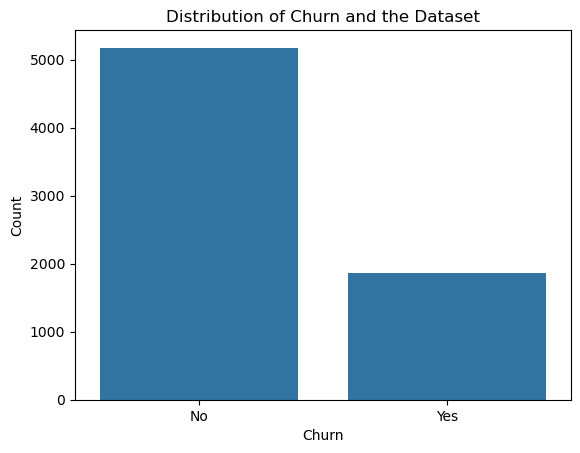

Shape of the dataset: (7043, 20)
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [98]:
## YOUR CODE HERE
sns.countplot(data=telco_df, x="Churn")
plt.title("Distribution of Churn and the Dataset")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

print(f"Shape of the dataset: {telco_df.shape}")
print(telco_df.describe())

**Add comment here**<br>
From the plot above, we can see that the dataset is imbalanced with most people deciding not to churn, more than twice the number of people deciding to leave the service.<br>
From the shape of the dataset, we can see that there are 7043 samples of customer data and 20 features.<br>
From the statistical data, we can see:<br>
 - Only about 16% are senior citizens, so most of the customers are young.
 - Tenure has a high variance (standard deviance) of 24.55%, so customers stay either long-term or short-term.
 - Same logic as tenure goes for MonthlyCharges and TotalCharges. The variance is high.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [99]:
## YOUR CODE HERE
X = telco_df.drop(columns="Churn")
y = telco_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Distribution of development set: ", y_train.value_counts(normalize=True))
print("Distribution of testing set: ", y_test.value_counts(normalize=True))

Distribution of development set:  Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64
Distribution of testing set:  Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64


**Add comment here**<br>
Since the dataset is imbalanced, we cannot randomly split the data. Therefore, we perform stratified splitting which makes sure that both the development and testing sets will have the same proportion of target variable (Churn=Yes and Churn=No).<br>
From the above output, we can see that in both the development and test sets, almost 73% of people decide not to churn, and almost 26% of people decide to churn which indicates that the stratified splitting was a good choice.

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Please briefly justify.
Do we need to apply scaling? Please briefly Justify**.

In [100]:
## YOUR CODE HERE
#print(telco_df)

categorical_columns = telco_df.select_dtypes(include=["object"]).columns.tolist()
numerical_columns = telco_df.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_columns.remove("Churn")
print("Categorical columns:\n", categorical_columns)
print("Numerical columns:\n", numerical_columns)

Categorical columns:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


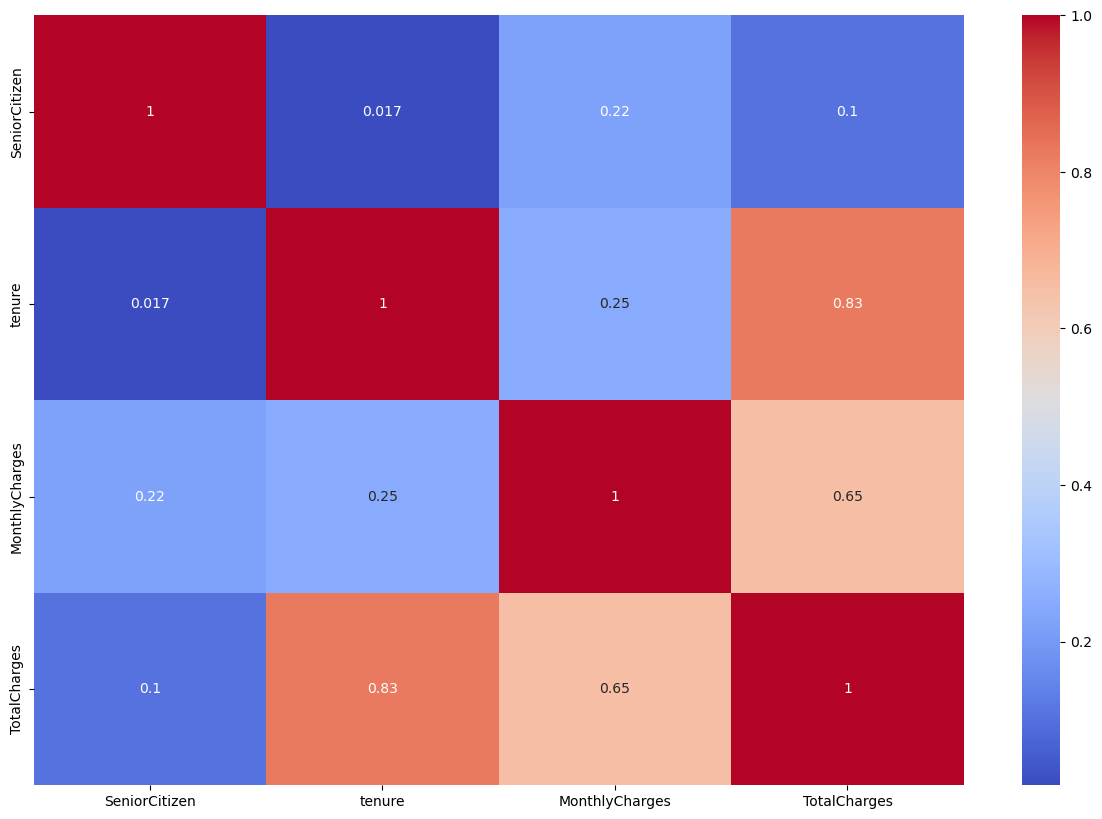

In [101]:
#check for null values in the columns
missing_values = telco_df.isnull().sum()
#print(missing_values)

correlation_matrix = telco_df[numerical_columns].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [102]:
# Checking if we should drop any column
high_corr_pairs = np.where(abs(corr_matrix)>0.9)
high_corr_features = set()

for i, j in zip(*high_corr_pairs):
    if i!=j:
        high_corr_features.add(numerical_df.columns[j])

telco_df.drop(columns=high_corr_features, inplace=True)
print("Dropped features are: ", high_corr_features)

Dropped features are:  set()


In [103]:
# Binary encoding for Yes/No columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
telco_df[binary_cols] = telco_df[binary_cols].replace({'Yes': 1, 'No': 0})

# Handling "No internet service" cases
internet_related_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']
telco_df[internet_related_cols] = telco_df[internet_related_cols].replace({'No internet service': 0, 'Yes': 1, 'No': 0})

# Handling MultipleLines separately (No phone service → No)
telco_df['MultipleLines'] = telco_df['MultipleLines'].replace({'No phone service': 'No'})
telco_df['MultipleLines'] = telco_df['MultipleLines'].map({'Yes': 1, 'No': 0})

# One-hot encoding for nominal categorical variables
telco_df = pd.get_dummies(telco_df, columns=['gender', 'Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

# Display processed dataframe
print(telco_df.head())

   SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   

   TotalCharges  Churn  gender_Male  Contract_One year  Contract_Two year  \
0         29.85     No     

C:\Users\Siri\AppData\Local\Temp\ipykernel_28768\164105657.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_df[binary_cols] = telco_df[binary_cols].replace({'Yes': 1, 'No': 0})
C:\Users\Siri\AppData\Local\Temp\ipykernel_28768\164105657.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_df[internet_related_cols] = telco_df[internet_related_cols].replace({'No internet service': 0, 'Yes': 1, 'No': 0})


In [71]:
# Scaling
#scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
telco_df[numerical_columns] = scaler.fit_transform(telco_df[numerical_columns])

print(telco_df.head())

   SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  \
0              0        1           0  0.013889             0              0   
1              0        0           0  0.472222             1              0   
2              0        0           0  0.027778             1              0   
3              0        0           0  0.625000             0              0   
4              0        0           0  0.027778             1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   

   TotalCharges  Churn  gender_Male  Contract_One year  Contract_Two year  \
0      0.003437

**Add comment here**<br>
We have already dropped the customerID column in 1.3, we check if other features are highly correlated with a threshold=0.9. From the output, we see that none of the features had that high of a correlation so none of the features were dropped.<br>
The dataset benefits from a combination of encoding techniques because we have both nominal and ordinal data.<br>
- There are several columns with binary data so I have used BinaryEncoder which simplifies the task and avoids complexities.<br>
- 

**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

* Accuracy = (True Positive + True Negative) / Total Observation - Good for balanced classes
* Precision = True Positive / (True Positive + False Positive)
* Recall = True Positive / (True Positive + False Negative)
* F-1 = 2 * (Precision * Recal) / (Precision + Recall) - Adjust for inbalance classes



In [318]:
## YOUR CODE HERE xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# Ensure no missing values
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

param_grid = {
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10],
    "ccp_alpha": [0.00001, 0.0001, 0.001]
}

dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')

#scoring = make_scorer(f1_score, pos_label="Yes")
#grid_search = GridSearchCV(dt_classifier, param_grid, cv=10, scoring=scoring, n_jobs=-1, error_score='raise')

#grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
#grid_search.fit(X_train, y_train)
#print("Best parameters:", grid_search.best_params_)

# Train with best params
#dt_best = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
#dt_best.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

'''print("y_train:\n",y_train)
print("------------")
print("y_train_pred\n",y_test)
print("------------")'''

#training scores
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label="Yes")
train_recall = recall_score(y_train, y_train_pred, pos_label="Yes")
train_f1 = f1_score(y_train, y_train_pred, pos_label="Yes")

#testing scores
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label="Yes")
test_recall = recall_score(y_test, y_test_pred, pos_label="Yes")
test_f1 = f1_score(y_test, y_test_pred, pos_label="Yes")

print("Training Scores:\n")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print("Testing Scores:\n")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing Precision: {test_precision:.4f}")
print(f"Testing Recall: {test_recall:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

Training Scores:

Training Accuracy: 0.9979
Training Precision: 0.9927
Training Recall: 0.9993
Training F1 Score: 0.9960
Testing Scores:

Testing Accuracy: 0.7317
Testing Precision: 0.4946
Testing Recall: 0.4893
Testing F1 Score: 0.4919


In [77]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply OneHotEncoder
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=10, min_samples_leaf=4, random_state=42, class_weight="balanced")
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, pos_label="Yes")
test_f1 = f1_score(y_test, y_test_pred, pos_label="Yes")

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Training F1-score: {train_f1:.4f}")
print(f"Test F1-score: {test_f1:.4f}")


from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt_classifier, X_train, y_train, cv=5)
print("Cross validation score: ", cv_score)

Training Accuracy: 0.8758
Test Accuracy: 0.7282
Training F1-score: 0.7964
Test F1-score: 0.5541
Cross validation score:  [0.74179237 0.7284827  0.6974268  0.72404614 0.69804618]


**Add comment here**<br>
In this case, the F1 scoring metric seems like a better choice because we have an imbalanced dataset and the F1 score will balance false positives and false negatives.<br>
The development accuracy and F1 score are higher than the testing set. The model fits well with the training set but the model might be overfitting to the testing set by degrading generalization.

**1.8: Visualize the trained tree until the suitable max_depth.**

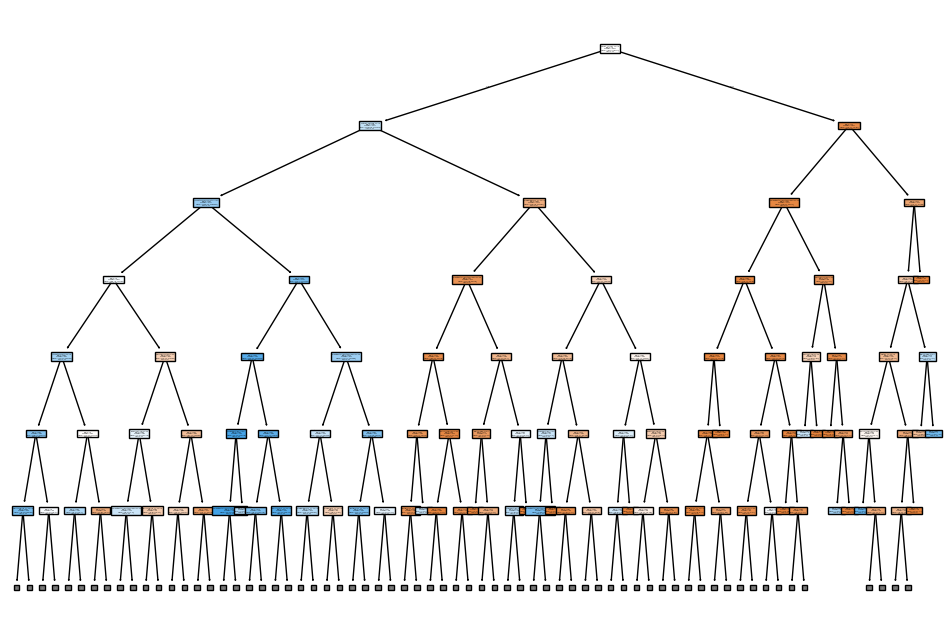

In [79]:
from sklearn.tree import plot_tree

max_depth = 6
plt.figure(figsize=(12,8))
plot_tree(dt_classifier, max_depth=max_depth, feature_names=X_train.columns, class_names=["No", "Yes"], filled=True)
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

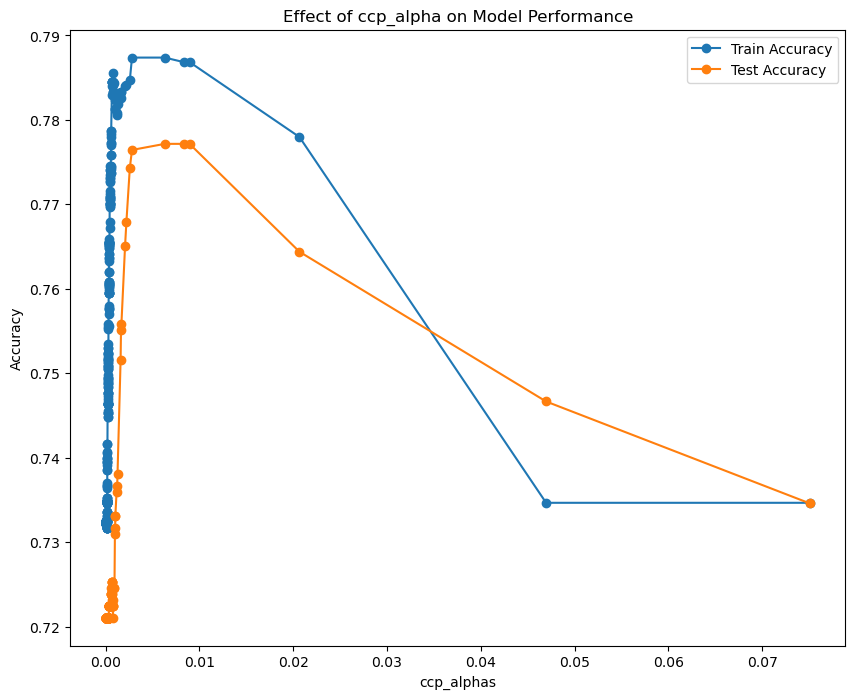

In [80]:
## YOUR CODE HERE
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

train_scores = [cross_val_score(tree, X_train, y_train, cv=5).mean() for tree in trees]
test_scores = [cross_val_score(tree, X_test, y_test, cv=5).mean() for tree in trees]

plt.figure(figsize=(10, 8))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy")
plt.xlabel("ccp_alphas")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of ccp_alpha on Model Performance")
plt.show()

In [82]:
# Step 1: Get the pruning path for the tree
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)

# Step 2: Extract the alpha values and corresponding impurities
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Step 3: Create an empty list to store the results of pruned trees
train_accuracies = []
test_accuracies = []
f1_train = []
f1_test = []

# Step 4: For each alpha value, prune the tree and evaluate its performance
for alpha in ccp_alphas:
    # Prune the tree using the current alpha
    dt_classifier_pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha, random_state=42)
    dt_classifier_pruned.fit(X_train, y_train)
    
    # Evaluate performance
    train_accuracy = dt_classifier_pruned.score(X_train, y_train)
    test_accuracy = dt_classifier_pruned.score(X_test, y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    y_train_pred = dt_classifier_pruned.predict(X_train)
    y_test_pred = dt_classifier_pruned.predict(X_test)
    
    f1_train.append(f1_score(y_train, y_train_pred, pos_label='Yes'))
    f1_test.append(f1_score(y_test, y_test_pred, pos_label='Yes'))

# Step 5: Find the best alpha value (the one that gives the highest test F1 score)
best_alpha_index = np.argmax(f1_test)
best_alpha = ccp_alphas[best_alpha_index]

# Step 6: Print the optimal alpha and performance of the pruned tree
print(f"Optimal alpha value: {best_alpha}")
print(f"Train Accuracy: {train_accuracies[best_alpha_index]}")
print(f"Test Accuracy: {test_accuracies[best_alpha_index]}")
print(f"Train F1-score: {f1_train[best_alpha_index]}")
print(f"Test F1-score: {f1_test[best_alpha_index]}")


Optimal alpha value: 0.0011831087523225155
Train Accuracy: 0.7949946751863685
Test Accuracy: 0.7913413768630234
Train F1-score: 0.6143572621035058
Test F1-score: 0.6090425531914894


In [85]:
## YOUR CODE HERE
pruned_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)
pruned_accuracy = pruned_tree.score(X_test, y_test)
print(f"Pruned Decision Tree Accuracy on Test Data: {pruned_accuracy:.4f}")

Pruned Decision Tree Accuracy on Test Data: 0.7913


In [333]:
## YOUR CODE HERE  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
optimal_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Optimal ccp_alpha: {optimal_alpha}")

Optimal ccp_alpha: 0.0036297748752750422


In [335]:
#Pruning
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)
pruned_accuracy = pruned_tree.score(X_test, y_test)
print(f"Pruned Decision Tree Accuracy on Test Data: {pruned_accuracy:.4f}")

Pruned Decision Tree Accuracy on Test Data: 0.7878


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [87]:
## YOUR CODE HERE
feature_importances = dt_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_features)

             Feature  Importance
6  Contract_Two year    0.213918
3       TotalCharges    0.165851
2     MonthlyCharges    0.136358


**Comment**<br>
The 3 most important features and why they are important:
 - Contract_Two_year: has the highest importance as the probability of churning is less in customers who have a 2-year contract.
 - TotalCharges: has the second highest importance as it directly affects the churn rate. Lower total charges mean customers are relatively new and higher total charge means customers are using the services for a long time and are less likely to discontinue the services. This shows how long the customer has been using the services.
 - MonthlyCharges: has the third highest importance. If the monthly charges are more then people are likely to churn and vice versa. Thus, this directly affects the churn rate.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn (use random_state=42). Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [350]:
## YOUR CODE HERE
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf= rf_classifier.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_train_f1 = f1_score(y_train, y_train_pred_rf, pos_label="Yes")
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
rf_test_f1 = f1_score(y_test, y_test_pred_rf, pos_label="Yes")

print(f"RandomForest Model Accuracy on Training Data: {rf_train_accuracy:.4f}")
print(f"RandomForest Model F1 Score on Training Data: {rf_train_f1:.4f}")
print(f"RandomForest Model Accuracy on Test Data: {rf_test_accuracy:.4f}")
print(f"RandomForest Model F1 Score on Test Data: {rf_test_f1:.4f}")

print(f"DT Train Accuracy: {train_accuracy:.4f}")
print(f"Train Accuracy Comparison with DT: {rf_train_accuracy - train_accuracy:.4f}")
print(f"Train F1 Score Comparison with DT: {rf_train_f1 - train_f1:.4f}")

print(f"DT Test Accuracy: {test_accuracy:.4f}")
print(f"Test Accuracy Comparison with DT: {rf_test_accuracy - test_accuracy:.4f}")
print(f"Test F1 Score Comparison with DT: {rf_test_f1 - test_f1:.4f}")

RandomForest Model Accuracy on Training Data: 0.9980
RandomForest Model F1 Score on Training Data: 0.9963
RandomForest Model Accuracy on Test Data: 0.7899
RandomForest Model F1 Score on Test Data: 0.5515
DT Train Accuracy: 0.9979
Train Accuracy Comparison with DT: 0.0002
Train F1 Score Comparison with DT: 0.0003
DT Test Accuracy: 0.7317
Test Accuracy Comparison with DT: 0.0582
Test F1 Score Comparison with DT: 0.0596


In [345]:
#RandomForest Important Features
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_features)

           Feature  Importance
16    TotalCharges    0.191706
15  MonthlyCharges    0.176018
4           tenure    0.168814


**Add comment here**<br>
RandomForest performs slightly better than DecisionTree on training and testing data but there's not much difference.

**2.2: Do all trees in the trained random forest model have pure leaves? Explain your results. How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [353]:
## YOUR CODE HERE
pure_leaves_per_tree = []
for tree in rf_classifier.estimators_:
    leaf_nodes = tree.apply(X_train.values)
    unique_leaf_node = np.unique(leaf_nodes)
    
    pure_leaves = True
    for node in unique_leaf_node:
        samples_in_leaf = y_train[leaf_nodes == node]
        if len(np.unique(samples_in_leaf))>1:
            pure_leaves = False
            break
    pure_leaves_per_tree.append(pure_leaves)

pure_trees = sum(pure_leaves_per_tree)
print(f"Out of {len(rf_classifier.estimators_)} trees, {pure_trees} have pure leaves")

Out of 100 trees, 0 have pure leaves


**Add comment here**<br>
No, none of the 100 trees are pure.

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [363]:
param_grid = {'n_estimators': [100, 200, 300, 400],
             'max_depth': [10, 20, 30, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
rf = RandomForestClassifier(random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

grid_search.fit(X_train, y_train_encoded)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy Score: {grid_search.best_score_}")

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

y_test_encoded = le.transform(y_test)

print(f"Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
print(f"Test F1 Score: {f1_score(y_test_encoded, y_pred)}")

Best Parameters: {'ccp_alpha': 0.001, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Accuracy Score: 0.6157062896636949
Test Accuracy: 0.7444996451383961
Test F1 Score: 0.625


**Add comment here**<br>
We can see that the RandomForest model accuracy has decreased from 0.7899 to 0.6157 and F1 score has increased from 0.5515 to 0.625.<br>
Previously, the model might have been overfitted as it learns from noise in the training set.<br>
The increase in F1 score indicates that the model is now tuned better than before and balances precision and recall. Since we have an imbalanced dataset, the model learned with respect to the majority class (rather than the minority class).<br>
By using grid search, we found the best hyperparameters to be:<br>
 *ccp_alpha = 0.001<br>
 *min_samples_leaf = 5<br>
 *min_samples_split = 5<br>
Out of the 3, I would choose min_samples_leaf and min_samples_split as they directly affect the tree growth and help reduce overfitting.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [371]:
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50],  # Values for min_samples_split
    'min_samples_leaf': [1, 2, 5, 10, 20]     # Values for min_samples_leaf
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy Score: {best_score}")

results = grid_search.cv_results_

# Print the results for each parameter combination
#for mean_score, params in zip(results['mean_test_score'], results['params']):
    #print(f"Accuracy: {mean_score} for {params}")

# Evaluate on test data
y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 50}
Best Accuracy Score: 0.7999620173963476
Test Accuracy: 0.8048261178140526


In [372]:
# Create a list of dictionaries with 'accuracy' and 'params'
accuracy_results = [{'params': params, 'accuracy': mean_score} for mean_score, params in zip(results['mean_test_score'], results['params'])]

sorted_results = sorted(accuracy_results, key=lambda x: x['accuracy'], reverse=True)

# Get the top 5 highest accuracies
top_5_results = sorted_results[:5]

# Print the top 5 highest accuracies
for result in top_5_results:
    print(f"Parameters: {result['params']}, Accuracy: {result['accuracy']}")


Parameters: {'min_samples_leaf': 1, 'min_samples_split': 50}, Accuracy: 0.7999620173963476
Parameters: {'min_samples_leaf': 5, 'min_samples_split': 50}, Accuracy: 0.7997847127112486
Parameters: {'min_samples_leaf': 2, 'min_samples_split': 50}, Accuracy: 0.7996080384428078
Parameters: {'min_samples_leaf': 5, 'min_samples_split': 20}, Accuracy: 0.7996074080261496
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 10}, Accuracy: 0.7992537442809389


**Add comment here**<br>
For the hyperparameter min_samples_leaf, I tried gradually increasing the number of samples required in each leaf node. A lower value was specific but overfitted the model. So, keep a balance between the range.<br>
For the hyperparameter min_samples_split, lower values will overfit and higher values will generalize the model. A value of 10 is not too low and will reduce overfitting, a value of 20 will generalize the model, and a value of 50 will reduce the model complexity due to fewer splits.

**2.5: Perform model selection using the chosen values for the hyperparameters (use random_state=42). Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [381]:
## YOUR CODE HERE
rf = RandomForestClassifier(random_state=42, oob_score=True)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
oob_score = best_rf.oob_score_

print(f"Optimal Hyperparameters: {best_params}")
print(f"Out-of-Bag Score (OOB): {oob_score}")

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, pos_label='Yes')
test_f1 = f1_score(y_test, y_test_pred, pos_label='Yes')

# Print the performance of the optimal model
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")

Optimal Hyperparameters: {'min_samples_leaf': 1, 'min_samples_split': 50}
Out-of-Bag Score (OOB): 0.7988995385161519
Train Accuracy: 0.8296059637912673
Test Accuracy: 0.8048261178140526
Train F1 Score: 0.6281951975213013
Test F1 Score: 0.5723172628304821


**Add comment here**<br>
The accuracy and F1 score on the training set is lower in the optimal model (0.8296, 0.628) than in the plain-vanilla version (0.998, 0.9963). This might be because the model was overfitted in the latter.<br>
But the accuracy and F1 score on the testing set are higher in the optimal model (0.8048, 0.5723) than in the plain-vanilla version (0.5515, 0.5515). This shows that the hyperparameters improved the model performance.

 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [386]:
## YOUR CODE HERE
importances = grid_search.best_estimator_.feature_importances_
indices = importances.argsort()[-3:][::-1]

feature_names = X_train.columns
top_features = feature_names[indices]
top_importance = importances[indices]

top_features_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importance})
print(top_features_df)

          Feature  Importance
0          tenure    0.196745
1    TotalCharges    0.141878
2  MonthlyCharges    0.110034


**Add comment here**<br>
Q1.10 has MonthlyCharges, TotalCharges, OnlineSecurity, and the above question has tenure, TotalCharges, MonthlyCharges as the 3 most important features.<br>
The latter makes more sense than the former, replacing OnlineSecurity with tenure as longer tenure means a lower churn rate and vice versa. Tenure has a more direct effect on churn rate than OnlineSecurity.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [389]:
## YOUR CODE HERE
# ------------------ 1
# max_iter = [100,300,500]
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
             'max_iter': [100, 300, 500],
             'max_depth': [3, 5, None]}
hgb_clf = HistGradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(hgb_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

time_taken = end-start
print(f"Time taken for model selection: {time_taken:.4f} seconds")

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label="Yes")
print(f"Optimal Hyperparameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 score: {test_f1:.4f}")

Time taken for model selection: 59.2892 seconds
Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100}
Test Accuracy: 0.8084
Test F1 score: 0.5884


In [391]:
# max_iter = [10,50,100]
# ------------------ 2
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
             'max_iter': [10, 50, 100],
             'max_depth': [3, 5, None]}
hgb_clf = HistGradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(hgb_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

time_taken = end-start
print(f"Time taken for model selection: {time_taken:.4f} seconds")

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label="Yes")
print(f"Optimal Hyperparameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 score: {test_f1:.4f}")

Time taken for model selection: 12.7567 seconds
Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100}
Test Accuracy: 0.8084
Test F1 score: 0.5884


In [395]:
# max_depth = [4,6,10] 
# ------------------ 3
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
             'max_iter': [10, 50, 100],
             'max_depth': [4, 6, 10]}
hgb_clf = HistGradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(hgb_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

time_taken = end-start
print(f"Time taken for model selection: {time_taken:.4f} seconds")

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label="Yes")
print(f"Optimal Hyperparameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 score: {test_f1:.4f}")

Time taken for model selection: 13.5580 seconds
Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_iter': 50}
Test Accuracy: 0.8034
Test F1 score: 0.5784


In [398]:
#  learning_rate = [0.001, 0.01, 0.1]
# ------------------ 4
param_grid = {'learning_rate': [0.001, 0.01, 0.1],
             'max_iter': [10, 50, 100],
             'max_depth': [3, 5, None]}
hgb_clf = HistGradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(hgb_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

time_taken = end-start
print(f"Time taken for model selection: {time_taken:.4f} seconds")

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label="Yes")
print(f"Optimal Hyperparameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 score: {test_f1:.4f}")

Time taken for model selection: 12.9211 seconds
Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100}
Test Accuracy: 0.8084
Test F1 score: 0.5884


**Add comment here**<br>
The best 3 hyperparameters I chose are learning_rate, max_iter, and max_depth.<br>
Out of the 4 combinations above, the best results are from:<br>
 *learning_rate = [0.01, 0.1, 0.2]
 *max_iter = [10, 50, 100]
 *max_depth = [3, 5, None]<br>

Optimal Hyperparameters are learning_rate = 0.1, max_depth = 3, max_iter = 100.

**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [406]:
## YOUR CODE HERE
param_grid = {'eta': [0.01, 0.1, 0.2],
             'max_depth': [3, 5, 7],
             'n_estimators': [50, 100, 200]}
xgb_clf = XGBClassifier(random_state=42)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Optimal Hyperparameters: {best_params}")
print(f"Best Cross_Validation Accuracy: {best_score:.4f}")

y_test_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"XGBoost Test Accuracy: {test_accuracy:.4f}")
print(f"XGBoost Test F1 Score: {test_f1:.4f}")

Optimal Hyperparameters: {'eta': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Cross_Validation Accuracy: 0.8028
XGBoost Test Accuracy: 0.8048
XGBoost Test F1 Score: 0.5889


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

**Add comment here**<br>
HisGradientBoostingClassifier Accuracy = 0.084
XGBoost Accuracy: 0.8028<br>
HistGradientBoostingClassifier has a slightly better train and test accuracy than XGBoost.
But XGBoost has a slightly higher F1 score, which is good for an imbalanced dataset.<br>
I would choose XGBoost as it has a similar accuracy and slightly better F1 score than HistGradientBosstingClassifeir.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [408]:
## YOUR CODE HERE
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
imp_features = feature_importance.sort_values(by='Importance', ascending=False).head(3)
print(imp_features)

           Feature  Importance
4           tenure    0.196745
16    TotalCharges    0.141878
15  MonthlyCharges    0.110034


**Add comment here**<br>
XGBoost has the same 3 important features as RandomForest but with different importance values.<br>
Comparing XGBoost and DecisionTree, XGBoost replaces OnlineSecurity with tenure.<br>
Each feature has a different importance in each of the 3 models.

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [409]:
## YOUR CODE HERE
top_5_features = feature_importance.sort_values(by='Importance', ascending=False).head(5)
print(top_5_features)

X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

xgb_clf = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
start = time.time()
grid_search.fit(X_train_top5, y_train)
end = time.time()

optimal_params = grid_search.best_params_
best_score = grid_search.best_score_

y_test_pred = grid_search.best_estimator_.predict(X_test_top5)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

time_taken = end-start

print("Time taken for model selection: {:.4f} seconds".format(time_taken))
print("Optimal Hyperparameters:", optimal_params)
print("Best Cross-Validation Accuracy:", best_score)
print("XGBoost Test Accuracy:", test_accuracy)
print("XGBoost Test F1 Score:", test_f1)

           Feature  Importance
4           tenure    0.196745
16    TotalCharges    0.141878
15  MonthlyCharges    0.110034
7   OnlineSecurity    0.103589
10     TechSupport    0.096267
Time taken for model selection: 11.0918 seconds
Optimal Hyperparameters: {'eta': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.7346467539058252
XGBoost Test Accuracy: 0.7345635202271115
XGBoost Test F1 Score: 0.0


**Add comment here**<br>
Q3.2 output:<br>
Optimal Hyperparameters: {'eta': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Cross_Validation Accuracy: 0.8028
XGBoost Test Accuracy: 0.8048
XGBoost Test F1 Score: 0.5889
<br><br>
The learning rate (eta) differs when trained with only the top 5 features. The test accuracy is lower in Q3.5 because the model is now trained with only 5 features. This can lead to loss of important data from other features resulting in wrong predictions.<br>
The F1 score is 0 in Q3.5 which indicates that the model is not making meaningful minority class predictions (churn=yes). This is because the model does not have enough information to predict the minority class with information from only 5 features.<br>
The model is worse when trained with only 5 features because it might have been overfitted to only 5 features or underfitted if the left-out features also contain important information.